# Health Insurance Cross Sell Prediction (Classification)

## Intro

An insurance company that has provided Health Insurance to its customers. Now, the company need an assistance whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

## Problem

Due to time spending that insurance employees go through seeking a new customer in numberous marketing channels, an insurance company try a new strategy by reaching out their existance health insurance customers and asking whether they are intereted adding a vehicle insurance or not.

## Goals

- Focus on targeting which customer is more likely interested or not in joining vehicle insurance
- Aims to identify whether or not there are opportunities for an insurance company effectively to cross-sell vehicle insurance products through their health insurance customers.
- In addition, it seeks to investigate potential customers and to identify their profile.

**Variable Definition**

- id : Unique ID for the customer
- Gender : Gender of the customer
- Age : Age of the customer
- Driving_License : 
    - 0 : Customer does not have DL, 
    - 1 : Customer already has DL
- Region_Code : Unique code for the region of the customer
- Previously_Insured : 
    - 1 : Customer already has Vehicle Insurance, 
    - 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age : Age of the Vehicle
- Vehicle_Damage : 
    - 1 : Customer got his/her vehicle damaged in the past. 
    - 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium : The amount customer needs to pay as premium in the year
- PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage : Number of Days, Customer has been associated with the company
- Response : 
    - 1 : Customer is interested, 
    - 0 : Customer is not interested

## Target
- Response

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Data Sets

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
# Display the data types of each column using the attribute dtypes
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
# Method describe to obtain a statistical summary
df.describe()

# In this dataset, we have customers with the average age 36 years old, while the oldest is 85 years old and the youngest is 20 years old.
# No customers have been protected their vehicle with insurance for one full year commitment.
# The highest anual premium for a customer paid for a vehicle insurance is 17.6 times than the average on this dataset.
# Number of Days, Customer has been associated with the company in average is 154 days. However the newest customer has been only 10 days.

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
# Method describe to obtain a summary for object data
df.describe(include = 'O')

# Most frequent for gender is Male, Vehicle Age is between 1-2 year and the customers have damaged their vehicle.
# We have more male customers than female.
# Moreover, most customers has been damaged their vehicle at least once.

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Checking missing values

In [8]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = dataDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,381109,"[237979, 311357]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[61, 48]"
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,float64,0,0.0,53,"[17.0, 51.0]"
5,Previously_Insured,int64,0,0.0,2,"[0, 1]"
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
8,Annual_Premium,float64,0,0.0,48838,"[90151.0, 42258.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[120.0, 97.0]"


We have no missing value.

In [9]:
num_var = df._get_numeric_data().columns
cat_var= list(set(df.columns) - set(num_var))
print(num_var)
print('===')
print(cat_var)

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
===
['Vehicle_Age', 'Gender', 'Vehicle_Damage']


In [10]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## Exploratory Data Analysis

### Age

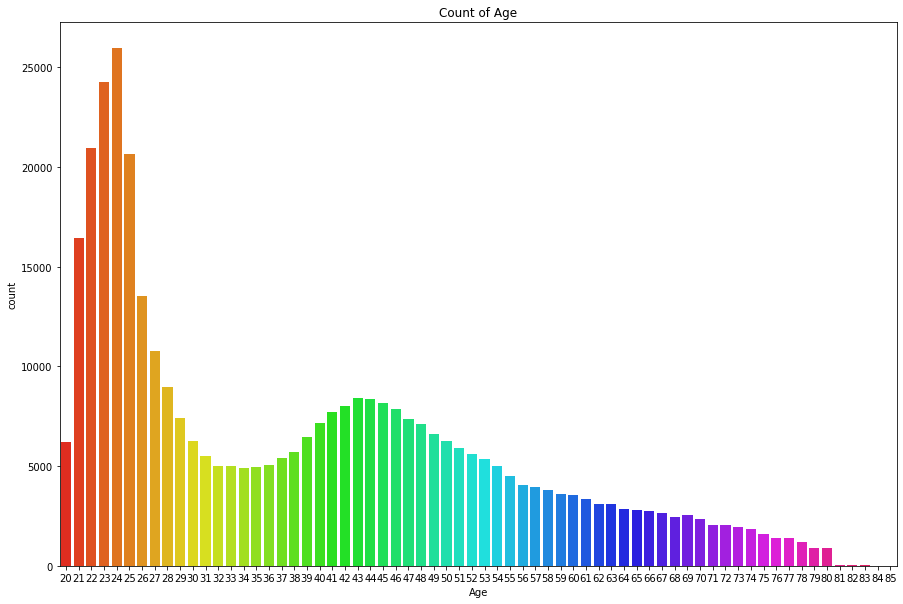

In [11]:
plt.figure(figsize = (15,10))
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Count of Age')
plt.show()

# We have customers with 20-ish years old. 

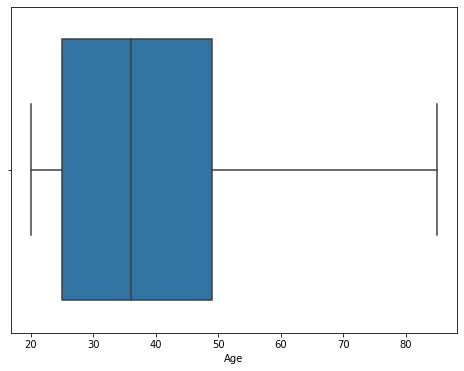

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Age'])
plt.show()

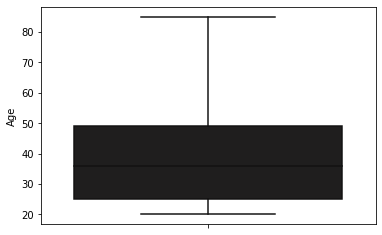

In [13]:
sns.boxplot(y = 'Age', data = df, palette='icefire')

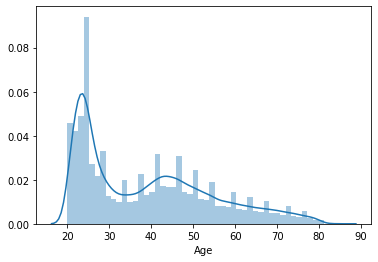

In [14]:
sns.distplot(df.Age)

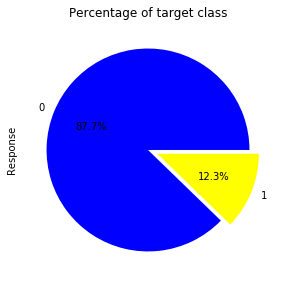

In [15]:
plt.subplot(1,2,2)
count = df['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['blue','yellow'], figsize = (10,7),explode = [0,0.1],title = "Percentage of target class")

# We have imbalance target data. We only have 12.3% customers who interested to join vehicle insurance.


### Gender

Our dataset dominated with `Male` customers.

In [16]:
df.Gender.value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

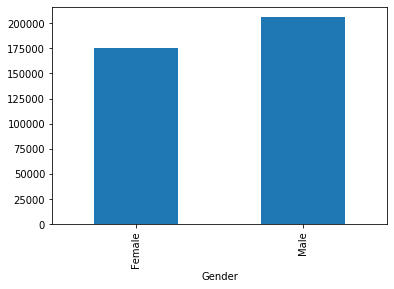

In [17]:
df.groupby('Gender').size().plot(kind='bar')

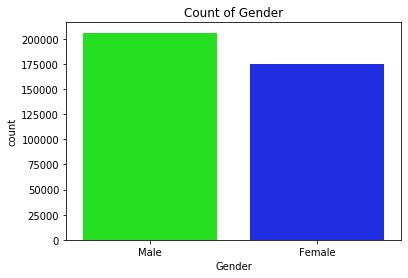

In [18]:
sns.countplot(df['Gender'], palette = 'hsv')
plt.title('Count of Gender')
plt.show()

### Vehicle Age

Customers already have the vehicle for `one to two years`

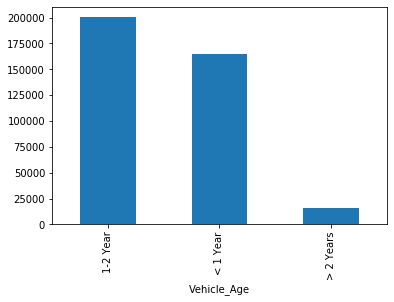

In [19]:
df.groupby('Vehicle_Age').size().plot(kind='bar')

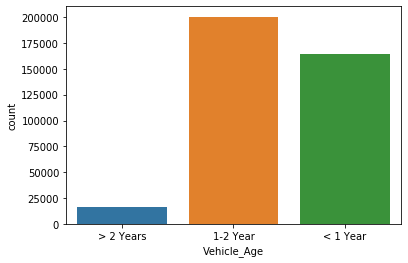

In [20]:
sns.countplot(df.Vehicle_Age)

### Vehicle Damage

We have more vehicle which already damaged for at least once than no damage at all.

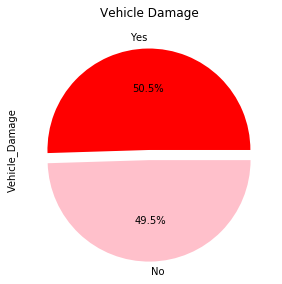

In [21]:
plt.subplot(1,2,2)
count = df['Vehicle_Damage'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['red','pink'], figsize = (10,7),explode = [0,0.1],title = "Vehicle Damage")

### Driving License

Only `0.2%` customers didn't have a driving license.

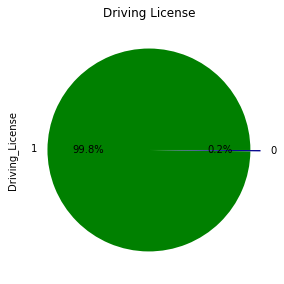

In [22]:
plt.subplot(1,2,2)
count = df['Driving_License'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','darkblue'], figsize = (10,7),explode = [0,0.1],title = "Driving License")

In [23]:
df.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

### Region Code

People with `region code 28` is the highest as compared to the other ones.

In [24]:
df.Region_Code.value_counts(ascending=False)

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

### Previously Insured

`54.2%` vehicle has never been insured.

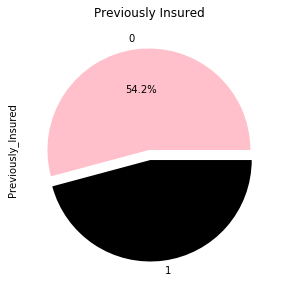

In [25]:
plt.subplot(1,2,2)
count = df['Previously_Insured'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['pink','black'], figsize = (10,7),explode = [0,0.1],title = "Previously Insured")

In [26]:
df.Previously_Insured.value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

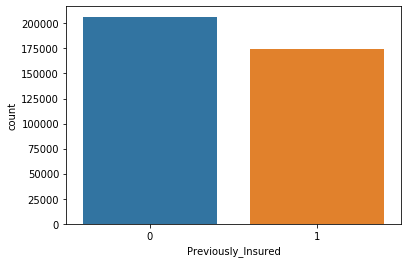

In [27]:
sns.countplot(df.Previously_Insured)

### Annual Premium

Most customers paid an annual premium at `2,630`.

In [28]:
df.Annual_Premium.value_counts()

2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64

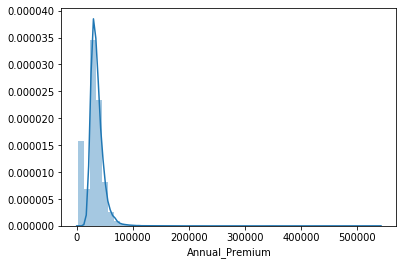

In [29]:
sns.distplot(df.Annual_Premium)

### Policy Sales Channel

Majorities Anonymized Codes for the channels of outreaching to the customers are `Code 26, 124 and 152` ie. Different Agents, Over Mail, Over Phone, In Person, etc.

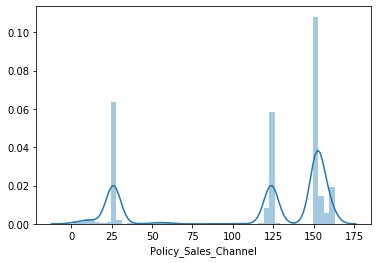

In [30]:
sns.distplot(df.Policy_Sales_Channel)

In [31]:
df.Policy_Sales_Channel.value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

### Vintage

Variaton of number of days, Customer has been associated with the company.

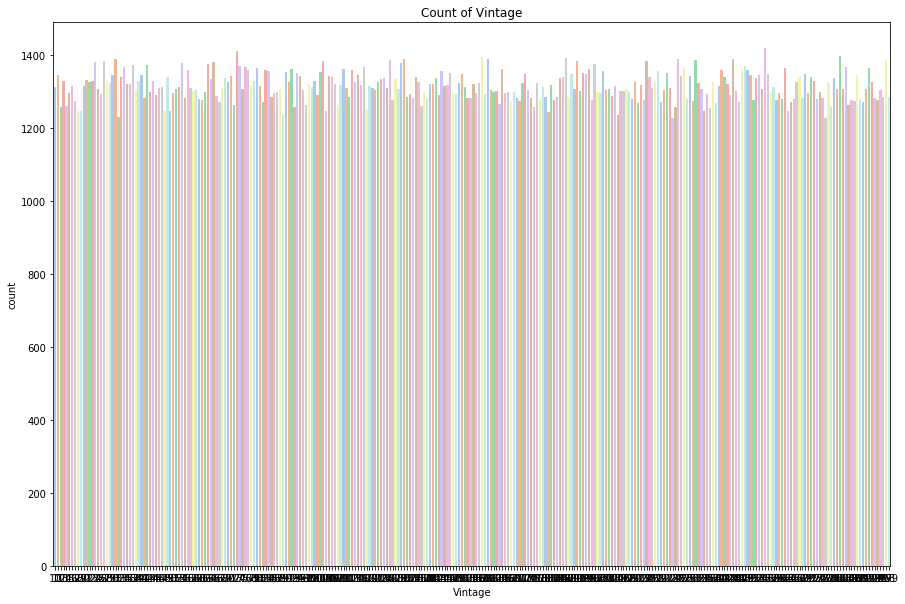

In [32]:
plt.figure(figsize = (15,10))
sns.countplot(df['Vintage'], palette = 'pastel')
plt.title('Count of Vintage')
plt.show()

## Multivariate

### Gender and Driving License

In general, `Men has driving license` than female

In [33]:
df.groupby(['Gender'])['Driving_License'].count().to_frame()

,Driving_License
Gender,
Female,175020
Male,206089


In [34]:
pd.crosstab(index = df['Gender'], columns = df['Driving_License'], normalize = 'columns')

Driving_License,0,1
Gender,,
Female,0.261084,0.459662
Male,0.738916,0.540338


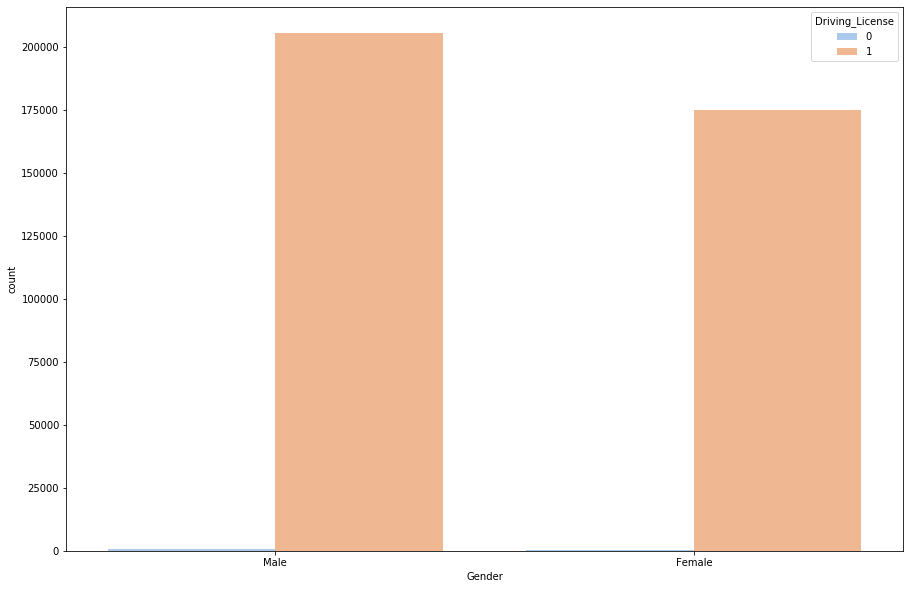

In [35]:

plt.figure(figsize = (15, 10))
sns.countplot(df['Gender'], hue = df['Driving_License'], palette = 'pastel')
plt.show()

### Gender and Response

Male customers more interested to insure their vehicle than female.

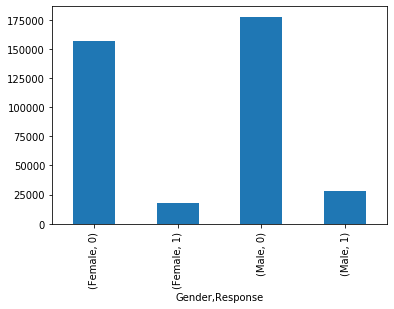

In [36]:
df.groupby(['Gender','Response']).size().plot(kind='bar')

### Previously Insured and Response

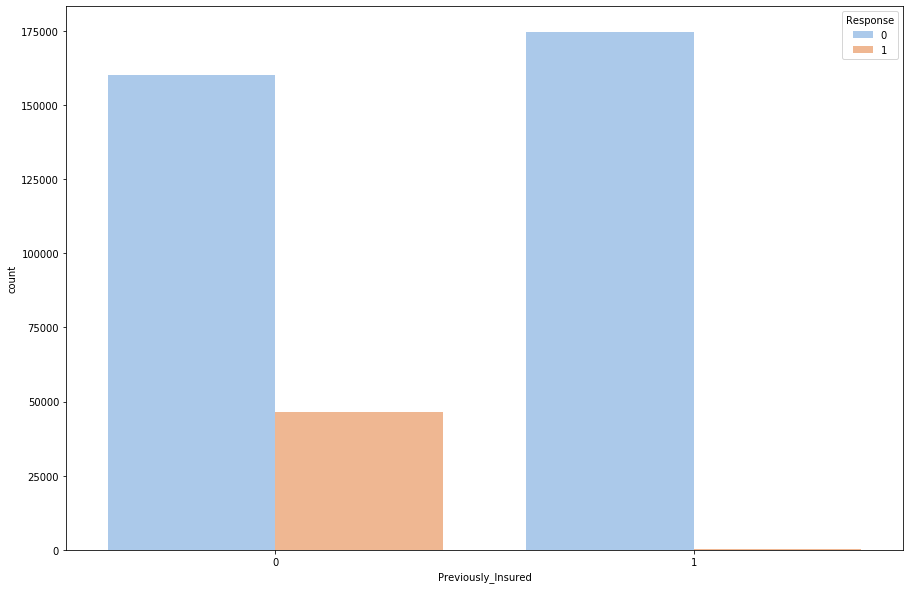

In [37]:

plt.figure(figsize = (15, 10))
sns.countplot(df['Previously_Insured'], hue = df['Response'], palette = 'pastel')
plt.show()

### Vehicle Age and Vehicle Damage

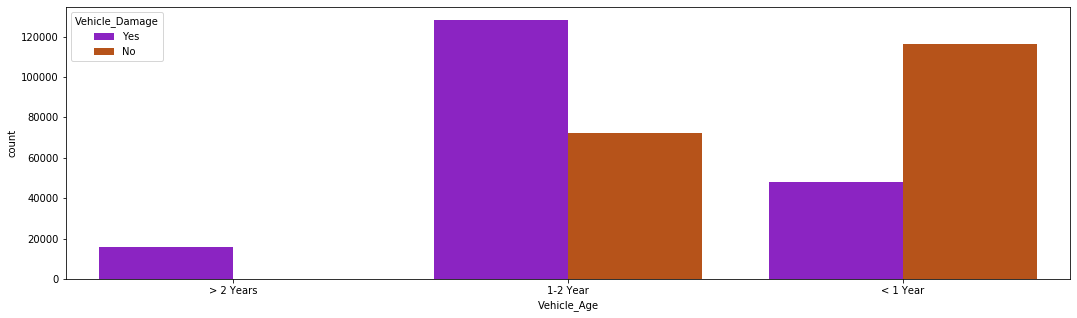

In [38]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Vehicle_Age'], hue = df['Vehicle_Damage'], palette = 'gnuplot')
plt.show()

# Vehicles with more than a year are most likely to experience a damage 
# the younger the vehicle, the less likely it has been damaged

In [39]:
region_top3 =  pd.crosstab(index = df['Region_Code'], columns = df['Response']).sort_values(1, ascending = False).head(3)
region_top3

Response,0,1
Region_Code,,
28.0,86498,19917
8.0,30620,3257
41.0,16039,2224


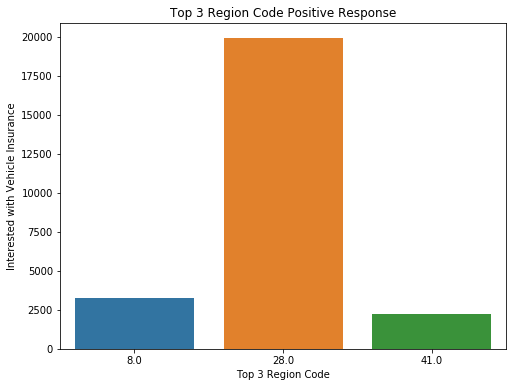

In [40]:
plt.figure(figsize = (8, 6))
sns.barplot(x = region_top3.index, y = region_top3[1])
plt.xlabel('Top 3 Region Code')
plt.ylabel('Interested with Vehicle Insurance')
plt.title('Top 3 Region Code Positive Response')
plt.show()

### Age Binning

In [41]:
bin_age = [17, 21, 37, 53, df['Age'].max()]
label_age = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers']

df['Age1'] = pd.cut(df['Age'], bins = bin_age, labels = label_age)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age1
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Gen X
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Baby Boomers
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Gen X
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Gen Z
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Millenials


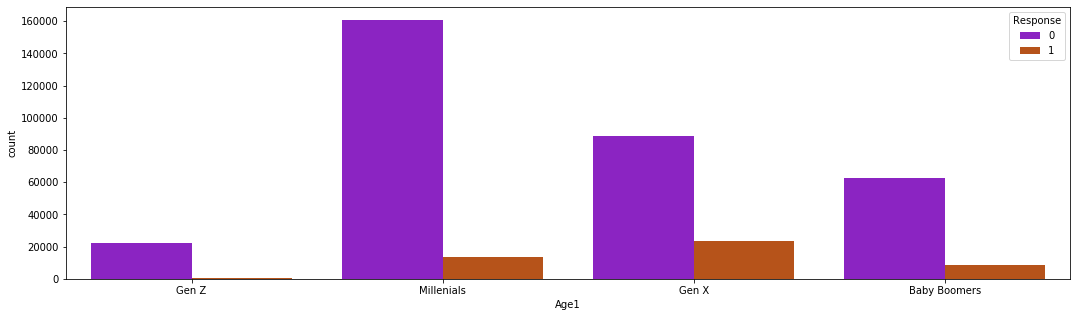

In [42]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Age1'], hue = df['Response'], palette = 'gnuplot')
plt.show()

### Age and Response

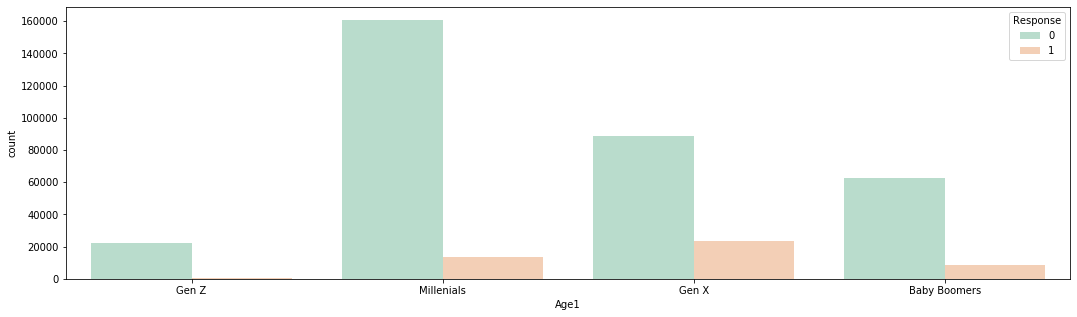

In [43]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Age1'], hue = df['Response'], palette = 'Pastel2')
plt.show()

# Generation X response positively higher than Millenials and Baby Boomer. However, Generation Z no response at all.

## Data Preprocessing

In [44]:
df['Gender_encode'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [45]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age1,Gender_encode
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Gen X,0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Baby Boomers,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Gen X,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Gen Z,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Millenials,1


In [46]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [47]:
df['Vehicle_Age_Encode'] = df['Vehicle_Age'].map({'< 1 Year' : 0, '1-2 Year' : 1, '> 2 Years' : 2})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age1,Gender_encode,Vehicle_Age_Encode
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Gen X,0,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Baby Boomers,0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Gen X,0,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Gen Z,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Millenials,1,0


## Data Wrangling

Drop the columns `id` using the method `drop()`

In [48]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age1,Gender_encode,Vehicle_Age_Encode
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Gen X,0,2
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Baby Boomers,0,1
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Gen X,0,2
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Gen Z,0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Millenials,1,0


In [49]:
# Missing value check
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Age1                    0
Gender_encode           0
Vehicle_Age_Encode      0
dtype: int64

In [50]:
## Check Data Proportion 
df['Response'].value_counts()/len(df)*100

0    87.743664
1    12.256336
Name: Response, dtype: float64

In [51]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64